In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [51]:
stocks = pd.read_csv('VTI_stocks.csv')

In [52]:
stocks.drop(columns=['Unnamed: 0'], inplace=True)
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-10-08,48.224998,48.645000,48.154999,48.325001,33.445217,726800
1,2001-10-09,48.299999,48.325001,47.955002,48.005001,33.223755,466400
2,2001-10-10,48.075001,49.174999,48.075001,49.145000,34.012741,665600
3,2001-10-11,49.875000,50.130001,49.724998,50.044998,34.635593,540200
4,2001-10-12,49.724998,49.955002,48.869999,49.665001,34.372612,353400


In [55]:
stocks['Date'] = pd.to_datetime(stocks['Date']) # data didn't save as timestamp??

In [57]:
stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,90.145104,90.600792,89.572992,90.127421,78.739161,2.152149e+06
std,43.746694,43.899970,43.547416,43.746005,47.133609,2.445899e+06
min,33.669998,34.700001,29.760000,33.700001,25.526678,2.600000e+04
25%,57.500000,57.655001,57.119999,57.451251,43.742478,5.128500e+05
50%,71.525002,71.875000,71.065003,71.515000,56.869476,1.735800e+06
75%,111.465002,111.702499,110.740000,111.400004,101.599226,2.787500e+06
max,234.309998,234.649994,233.679993,234.369995,233.632523,4.231620e+07


In [58]:
stocks = stocks.set_index('Date')

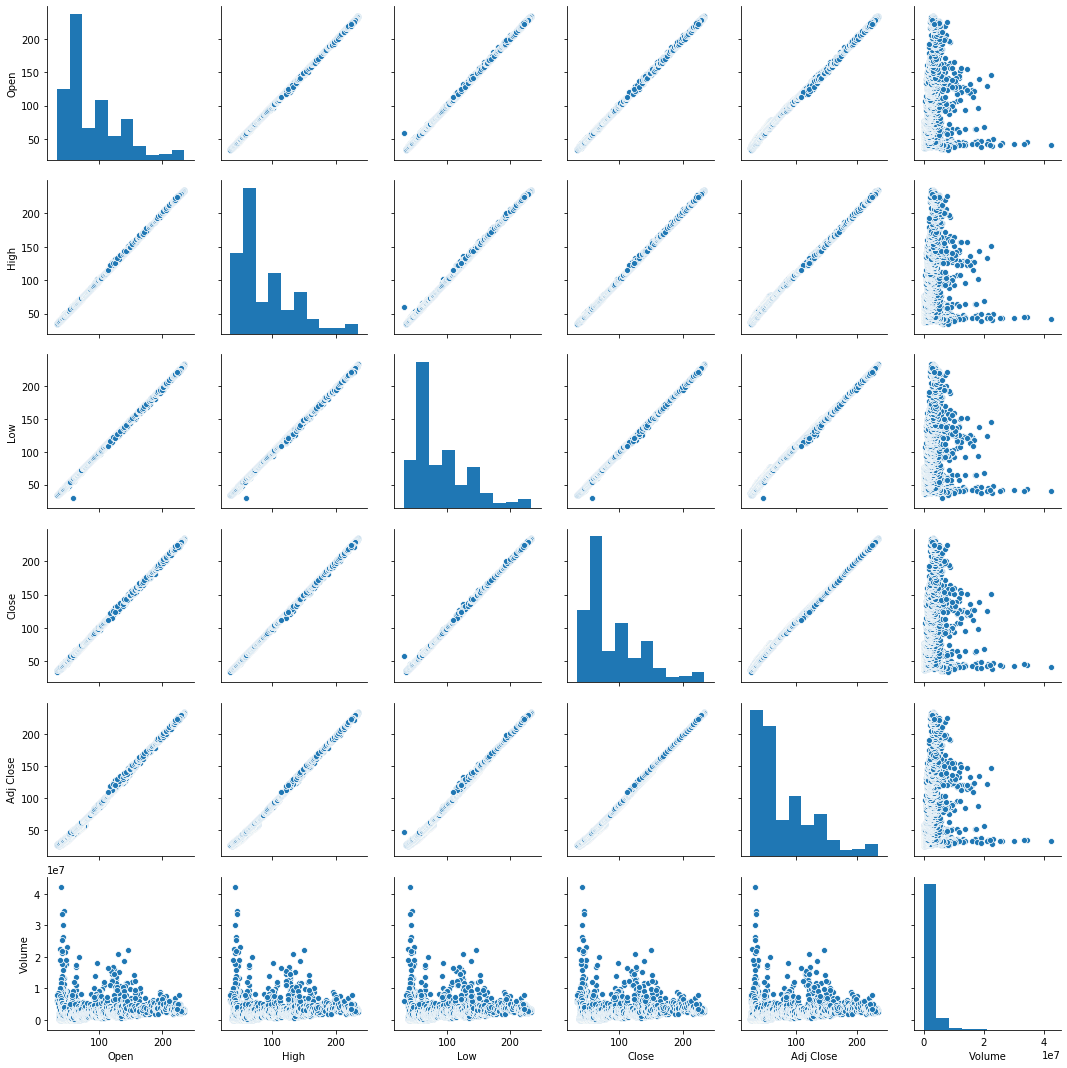

In [59]:
sns.pairplot(stocks)

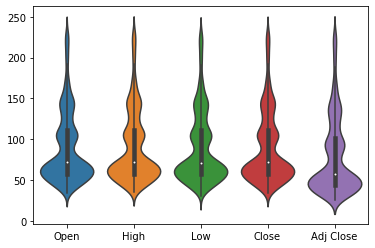

In [139]:
sns.violinplot(data=stocks.drop(columns=['Volume']))

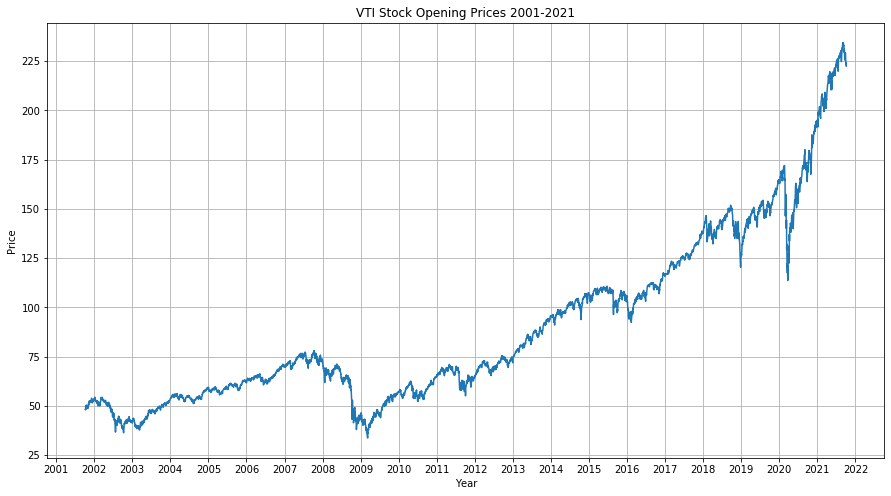

In [140]:
# Opening Prices (last 20 years)
fig, ax = plt.subplots(figsize=(15,8))
ax.plot('Open', data=stocks)

import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_major_locator(mdates.YearLocator()) # display each year

ax.set_title('VTI Stock Opening Prices 2001-2021')
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.grid()

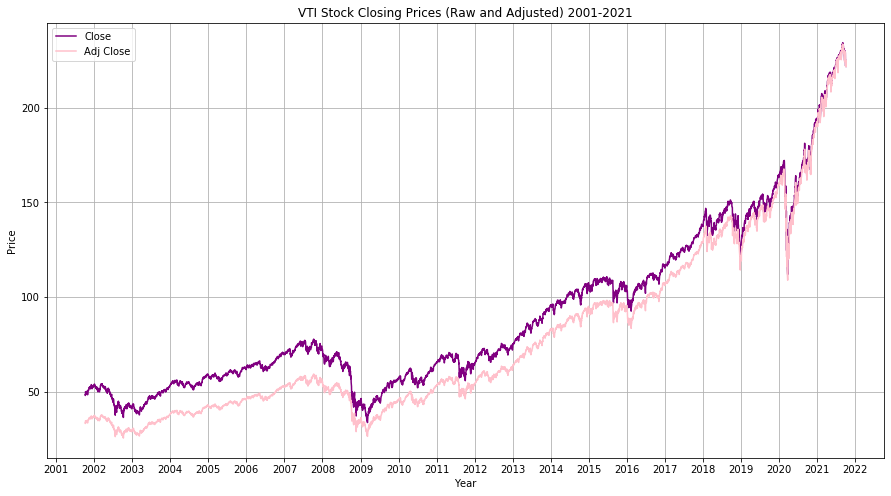

In [141]:
# Closing Prices (raw/adj) (last 20 years)
fig, ax = plt.subplots(figsize=(15,8))
ax.plot('Close', data=stocks, color='purple')
ax.plot('Adj Close', data=stocks, color='pink')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y")) # date display format
ax.xaxis.set_major_locator(mdates.YearLocator()) # display each year

ax.set_title('VTI Stock Closing Prices (Raw and Adjusted) 2001-2021')
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.grid()
ax.legend(loc='upper left')

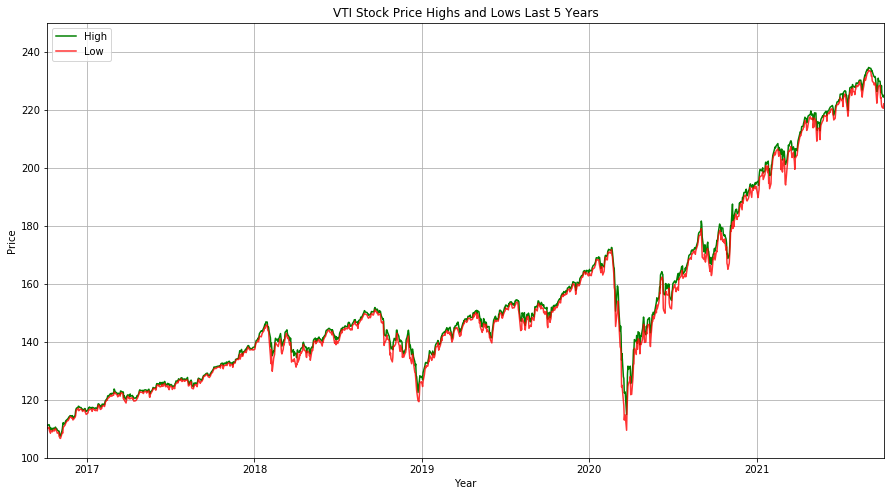

In [142]:
# Highs and Lows (2016-2021)
fig, ax = plt.subplots(figsize=(15,8))
ax.plot('High', data=stocks, color='g')
ax.plot('Low', data=stocks, color='r', alpha=0.8)

ax.set_xlim(['2016-10-06', '2021-10-06']) # date range
ax.set_ylim([100, 250])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y")) # date display format
ax.xaxis.set_major_locator(mdates.YearLocator()) # display each year

ax.set_title('VTI Stock Price Highs and Lows Last 5 Years')
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.grid()
ax.legend(loc='upper left')

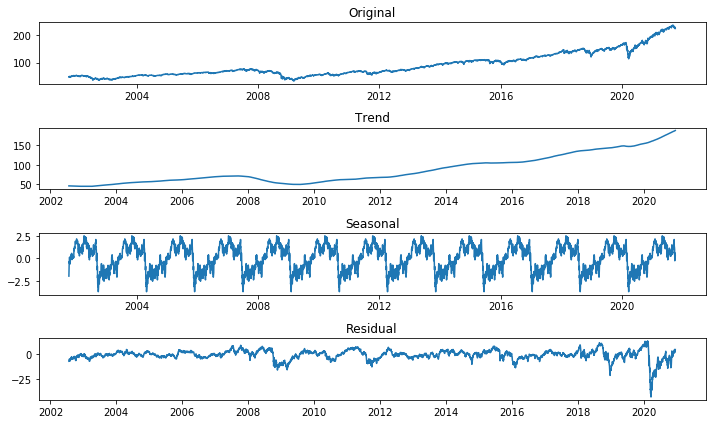

In [92]:
# Trends, Seasonality, Residual FOR OPENING PRICES
# **** We select stocks['Open'] for the time-being, considering the high correlation of other features ****
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(stocks['Open'], freq=400) 

trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

# Plot the original data, the trend, the seasonality, and the residuals 
fig, ax = plt.subplots(figsize=(10,6))

plt.subplot(411)
plt.plot(stocks['Open'], label = 'original')
plt.title('Original')

plt.subplot(412)
plt.plot(trend, label = 'trend')
plt.title('Trend')

plt.subplot(413)
plt.plot(seasonal, label = 'seasonality')
plt.title('Seasonal')

plt.subplot(414)
plt.plot(residual, label = 'residuals')
plt.title('Residual')
plt.tight_layout()

In [143]:
# Data stationarity
# KPSS test
from statsmodels.tsa.stattools import kpss # non stationary : p-val < 0.05
kpss(stocks['Open'])

/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(12.359285506489849,
 0.01,
 32,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Text(0, 0.5, 'Log($)')

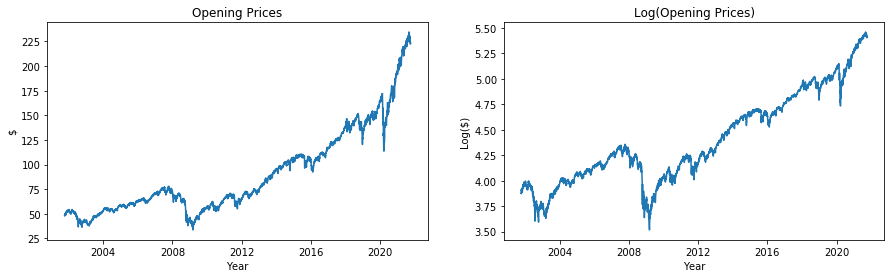

In [159]:
# take log to eliminate changing variance
log_open = np.log(stocks['Open'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
ax1.plot(stocks.index, stocks['Open']) # y
ax1.set_title('Opening Prices')
ax1.set_xlabel('Year')
ax1.set_ylabel('$')

ax2.plot(stocks.index, log_open) # log(y)
ax2.set_title('Log(Opening Prices)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Log($)')

Text(0.5, 0, 'Year')

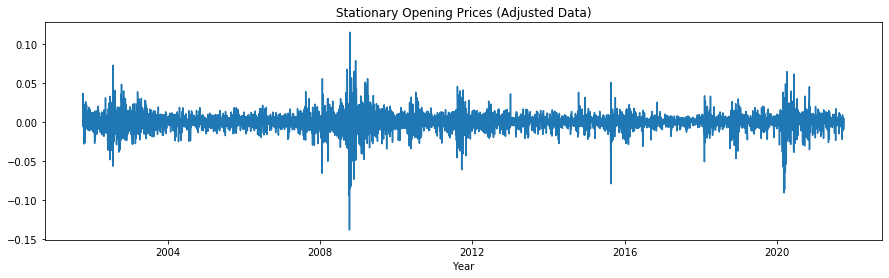

In [163]:
# difference data to obtain constant mean
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(stocks.index, log_open.diff())
ax.set_title('Stationary Opening Prices (Adjusted Data)')
ax.set_xlabel('Year')

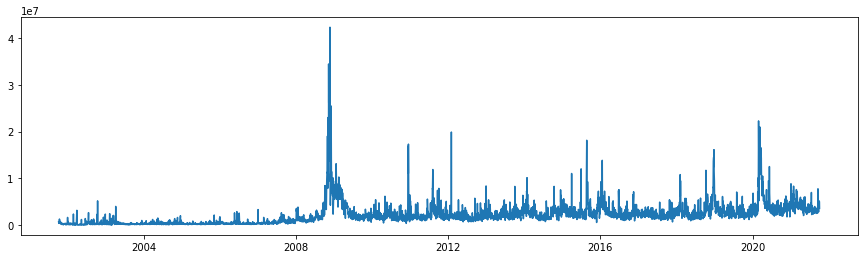

In [171]:
# Repeat process for VOLUME data
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(stocks.index, stocks['Volume'])

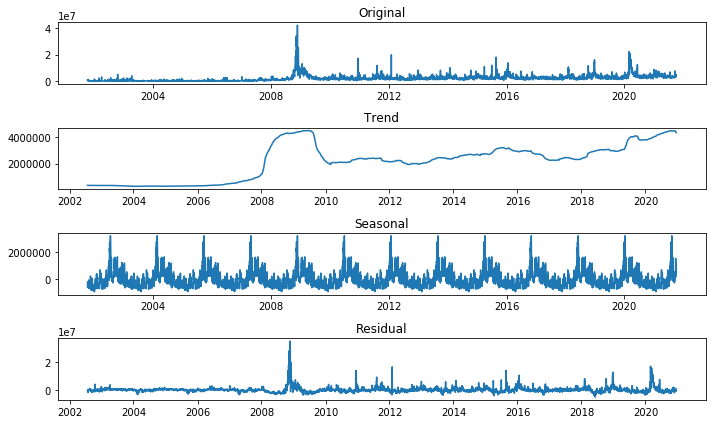

In [165]:
# Trends, Seasonality, Residual FOR VOLUME OF STOCK SHARES TRADED
decomposed = seasonal_decompose(stocks['Volume'], freq=400) 

trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

# Plot the original data, the trend, the seasonality, and the residuals 
fig, ax = plt.subplots(figsize=(10,6))

plt.subplot(411)
plt.plot(stocks['Volume'], label = 'original')
plt.title('Original')

plt.subplot(412)
plt.plot(trend, label = 'trend')
plt.title('Trend')

plt.subplot(413)
plt.plot(seasonal, label = 'seasonality')
plt.title('Seasonal')

plt.subplot(414)
plt.plot(residual, label = 'residuals')
plt.title('Residual')
plt.tight_layout()

In [172]:
# ADF - Augmented Dickey-Fuller test (Stationarity)
from statsmodels.tsa.stattools import adfuller
adfuller(stocks['Volume']) # p-val < 0.05   -->   non-stationary

(-5.5831071899296045,
 1.382220589347982e-06,
 31,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 154824.46321863367)

In [166]:
# KPSS test
kpss(stocks['Volume']) # double check for fun

/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(4.42676981179589,
 0.01,
 32,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Text(0, 0.5, 'Log(Number of Stocks)')

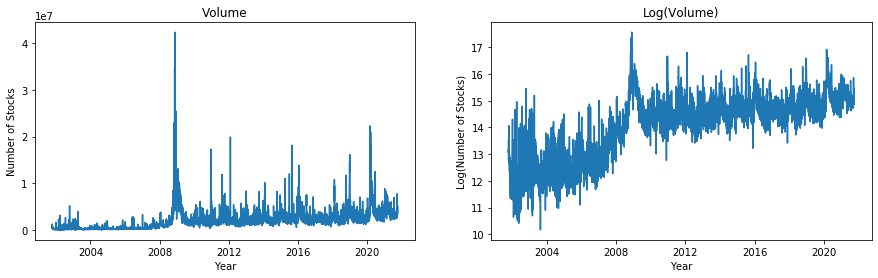

In [174]:
# take log to eliminate changing variance
log_vol = np.log(stocks['Volume'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
ax1.plot(stocks.index, stocks['Volume']) # y
ax1.set_title('Volume')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Stocks')

ax2.plot(stocks.index, log_vol) # log(y)
ax2.set_title('Log(Volume)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Log(Number of Stocks)')

Text(0.5, 0, 'Year')

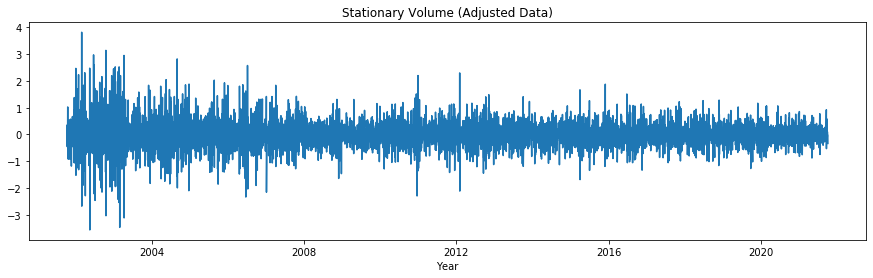

In [175]:
# difference data to obtain constant mean
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(stocks.index, log_vol.diff())
ax.set_title('Stationary Volume (Adjusted Data)')
ax.set_xlabel('Year')